In [38]:
# Importiamo le librerie necessarie
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dataset Reale m1

In [39]:

#data = pd.read_csv("../dati_reali_di_partenza_csv/dataset_clened_m1.csv")
data = pd.read_csv("./dataset_clened_m1.csv")
data.drop("Unnamed: 0", axis=1,inplace=True)
data.loc[data["oxigen_thrapy"] =='ventury_mask',"oxigen_thrapy"] = "venturi_mask"
data.loc[data["oxigen_thrapy"].isna(),"oxigen_thrapy"] ="ox" 
data.loc[data["oxigen_thrapy"]=="oxigen","oxigen_thrapy"]="ox"

data

Sesso  Età previous_alert   FC  SpO2 oxigen_thrapy   6MWT    TC   alert
0       F   78          BLANK   73    88            no  False  36.2  YELLOW
1       F   78         YELLOW   81    86            no  False  36.0     RED
2       F   78            RED   92    87            no  False  36.1     RED
3       F   78            RED  100    82            no  False  36.3     RED
4       F   78          BLANK   90    99            no  False  36.0   GREEN
..    ...  ...            ...  ...   ...           ...    ...   ...     ...
413     M   52          GREEN   88    93            no  False  36.0  YELLOW
414     M   79          GREEN   73    95            no  False  36.1   GREEN
415     M   76         YELLOW   72    94            no  False  38.5  YELLOW
416     F   56          GREEN  110    99            no  False  36.0   GREEN
417     M   76          GREEN   79    98            no  False  36.0   GREEN

[418 rows x 9 columns]

<Axes: xlabel='alert', ylabel='count'>

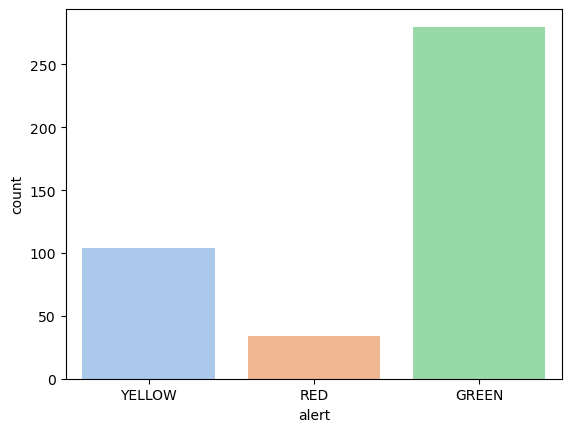

In [40]:
sns.countplot(x='alert',data=data,palette='pastel')

# Data analysis

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

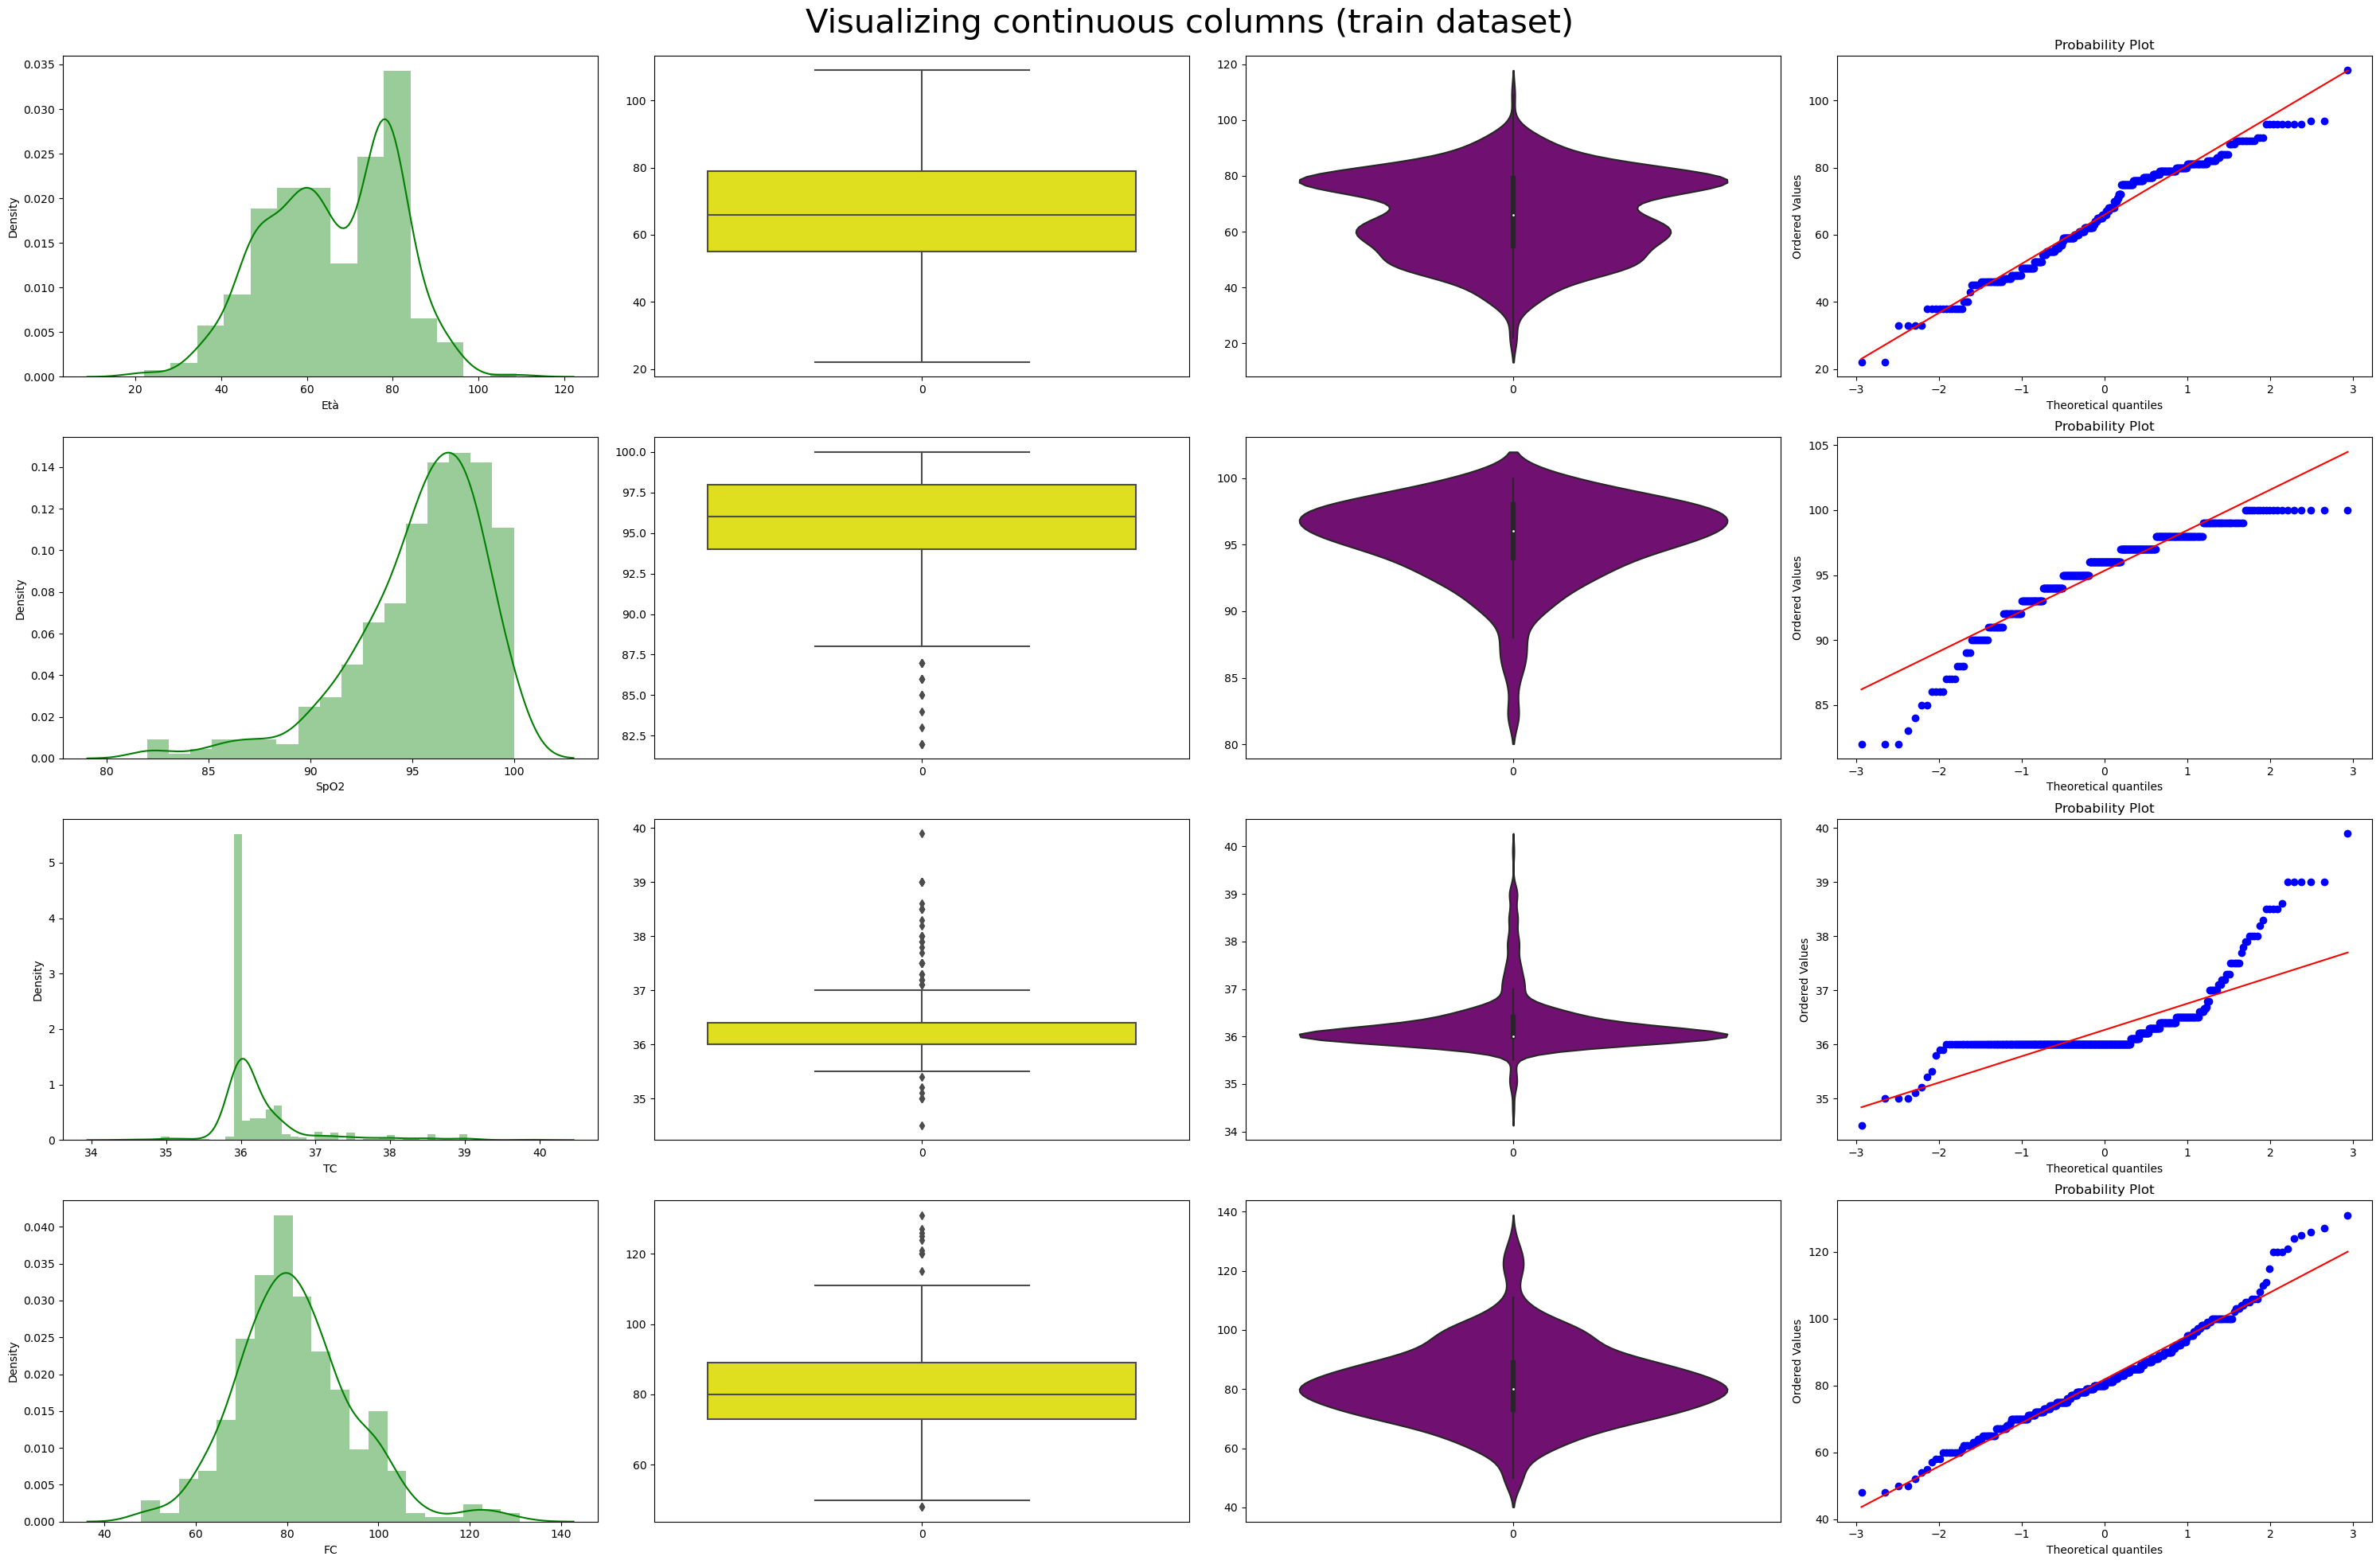

In [41]:
import warnings
numeric_features = ["Età", "SpO2","TC","FC"]
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(data[i],ax=ax[index,0],color='green')
    sns.boxplot(data[i],ax=ax[index,1],color='yellow')
    sns.violinplot(data[i],ax=ax[index,2],color='purple')
    stats.probplot(data[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

In [42]:


y = data["alert"]
data.drop("alert", axis=1, inplace = True)
# Colonne categoriche per OneHotEncoder
categorical_features = ["Sesso", "previous_alert", "oxigen_thrapy", "6MWT"]

encoder = OneHotEncoder(sparse_output=False)

# Applichiamo l'encoder solo alle colonne categoriche e trasformiamo i dati
encoded_data = encoder.fit_transform(data[categorical_features])

# Ottenere i nomi delle nuove colonne codificate
encoded_columns = encoder.get_feature_names_out(categorical_features)

# Creiamo un DataFrame per i dati codificati
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concateniamo il dataset codificato con le colonne non categoriali


In [43]:
data_final = pd.concat([ encoded_df[["Sesso_F","Sesso_M"]],data["Età"],encoded_df[["previous_alert_BLANK","previous_alert_GREEN","previous_alert_RED","previous_alert_YELLOW"]],data[["FC","SpO2"]],encoded_df[["oxigen_thrapy_no","oxigen_thrapy_ox","oxigen_thrapy_venturi_mask","6MWT_False","6MWT_True"]],data[["TC"]] ], axis=1)

X = data_final

In [44]:
X

Sesso_F  Sesso_M  Età  previous_alert_BLANK  previous_alert_GREEN  \
0        1.0      0.0   78                   1.0                   0.0   
1        1.0      0.0   78                   0.0                   0.0   
2        1.0      0.0   78                   0.0                   0.0   
3        1.0      0.0   78                   0.0                   0.0   
4        1.0      0.0   78                   1.0                   0.0   
..       ...      ...  ...                   ...                   ...   
413      0.0      1.0   52                   0.0                   1.0   
414      0.0      1.0   79                   0.0                   1.0   
415      0.0      1.0   76                   0.0                   0.0   
416      1.0      0.0   56                   0.0                   1.0   
417      0.0      1.0   76                   0.0                   1.0   

     previous_alert_RED  previous_alert_YELLOW   FC  SpO2  oxigen_thrapy_no  \
0                   0.0                    0.0   73    88               1.0   
1                   0.0                    1.0   81    86               1.0   
2                   1.0                    0.0   92    87               1.0   
3                   1.0                    0.0  100    82               1.0   
4                   0.0                    0.0   90    99               1.0   
..                  ...                    ...  ...   ...               ...   
413                 0.0                    0.0   88    93               1.0   
414                 0.0                    0.0   73    95               1.0   
415                 0.0                    1.0   72    94               1.0   
416                 0.0                    0.0  110    99               1.0   
417                 0.0                    0.0   79    98               1.0   

     oxigen_thrapy_ox  oxigen_thrapy_venturi_mask  6MWT_False  6MWT_True    TC  
0                 0.0                         0.0         1.0        0.0  36.2  
1                 0.0                         0.0         1.0        0.0  36.0  
2                 0.0                         0.0         1.0        0.0  36.1  
3                 0.0                         0.0         1.0        0.0  36.3  
4                 0.0                         0.0         1.0        0.0  36.0  
..                ...                         ...         ...        ...   ...  
413               0.0                         0.0         1.0        0.0  36.0  
414               0.0                         0.0         1.0        0.0  36.1  
415               0.0                         0.0         1.0        0.0  38.5  
416               0.0                         0.0         1.0        0.0  36.0  
417               0.0                         0.0         1.0        0.0  36.0  

[418 rows x 15 columns]

In [45]:
import pickle

def is_pickable(obj):
    try:
        pickle.dumps(obj)
        return True
    except Exception:
        return False

# Test della funzione con diversi tipi di oggetti

# Esempi di oggetti pickable


# Esempi di oggetti non pickable
import socket

non_pickable_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Controllo di pickabilità
print(f"pickable_data è pickable? {is_pickable(X)}")  # Dovrebbe stampare True
print(f"non_pickable_socket è pickable? {is_pickable(X)}")  # Dovrebbe stampare False


pickable_data è pickable? True
non_pickable_socket è pickable? True


In [46]:
print(X.dtypes)

Sesso_F                       float64
Sesso_M                       float64
Età                             int64
previous_alert_BLANK          float64
previous_alert_GREEN          float64
previous_alert_RED            float64
previous_alert_YELLOW         float64
FC                              int64
SpO2                            int64
oxigen_thrapy_no              float64
oxigen_thrapy_ox              float64
oxigen_thrapy_venturi_mask    float64
6MWT_False                    float64
6MWT_True                     float64
TC                            float64
dtype: object


In [47]:
columns_to_convert = ['Sesso_F', 'Sesso_M', 'previous_alert_BLANK', 
                       'previous_alert_GREEN', 'previous_alert_RED', 
                       'previous_alert_YELLOW', 'oxigen_thrapy_no', 
                       'oxigen_thrapy_ox', 'oxigen_thrapy_venturi_mask', 
                       '6MWT_False', '6MWT_True']

# Conversione delle colonne
X[columns_to_convert] = X[columns_to_convert].astype('int64')

In [48]:
print(X.dtypes)

Sesso_F                         int64
Sesso_M                         int64
Età                             int64
previous_alert_BLANK            int64
previous_alert_GREEN            int64
previous_alert_RED              int64
previous_alert_YELLOW           int64
FC                              int64
SpO2                            int64
oxigen_thrapy_no                int64
oxigen_thrapy_ox                int64
oxigen_thrapy_venturi_mask      int64
6MWT_False                      int64
6MWT_True                       int64
TC                            float64
dtype: object


In [49]:
y

0      YELLOW
1         RED
2         RED
3         RED
4       GREEN
        ...  
413    YELLOW
414     GREEN
415    YELLOW
416     GREEN
417     GREEN
Name: alert, Length: 418, dtype: object

In [50]:

# Creiamo un dataset sintetico (puoi sostituirlo con il tuo dataset)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Classi originali:", label_encoder.classes_)
print("Mappatura:", list(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inizializziamo un modello di Decision Tree
model = DecisionTreeClassifier(random_state=42)

Classi originali: ['GREEN' 'RED' 'YELLOW']
Mappatura: [('GREEN', 0), ('RED', 1), ('YELLOW', 2)]


In [51]:
y_encoded

array([2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2,
       2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
def plot_learning_curve(model, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Validation score')
    plt.ylabel('Score')
    plt.xlabel('Training Size')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()



# Funzione per tracciare la validation curve con preprocessing
def plot_validation_curve(model, X, y, param_name, param_range, cv=5):
    train_scores, test_scores = validation_curve(model, X, y, param_name=param_name, param_range=param_range, cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='Training score')
    plt.plot(param_range, test_mean, label='Validation score')
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.title(f'Validation Curve for {param_name}')
    plt.legend()
    plt.grid()
    plt.show()


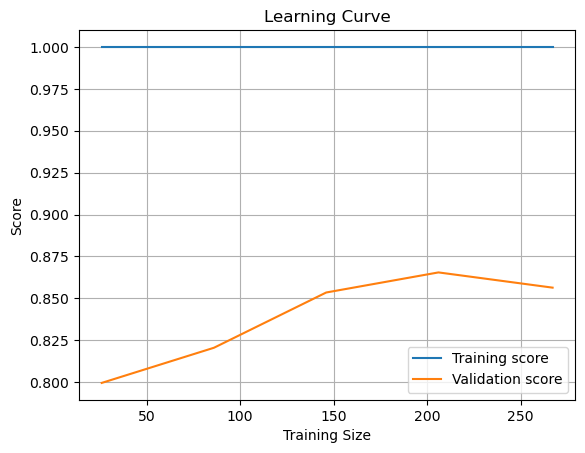

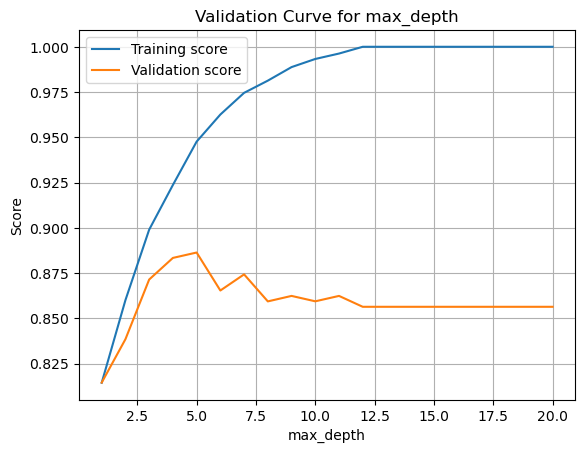

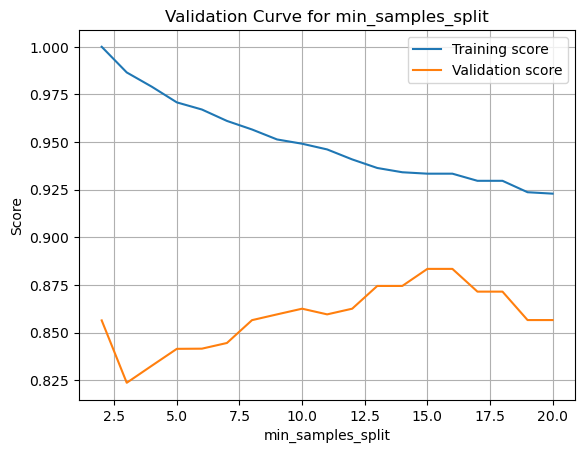

In [53]:
plot_learning_curve(model, X_train, y_train)
# Tracciamo le validation curve per max_depth e min_samples_split usando pipeline
plot_validation_curve(model, X_train, y_train, 'max_depth', np.arange(1, 21))
plot_validation_curve(model, X_train, y_train, 'min_samples_split', np.arange(2, 21))


In [54]:


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
}

grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Stampa dei migliori parametri trovati dalla Grid Search
print("Best parameters found by GridSearch:", grid_search.best_params_)

# Valutazione finale con 10-fold Cross Validation
best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X_train, y_train, cv=10)

# Stampa dei risultati della Cross Validation
print(f'10-Fold Cross Validation Accuracy: {np.mean(scores):.4f}')

# Previsione sul test set
y_pred = best_model.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}')

Best parameters found by GridSearch: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 13}
10-Fold Cross Validation Accuracy: 0.8978
Accuracy on test set: 0.8214


In [126]:
model = DecisionTreeClassifier(criterion='gini',max_depth= 5,max_features = None, max_leaf_nodes = 10, min_samples_leaf = 1, min_samples_split = 15)
model.fit(X,y_encoded)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=15)

In [127]:
from joblib import dump, load

dump(model, 'm1_dt.joblib')

['m1_dt.joblib']